In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw05.ipynb")

# Homework 5: Applying Functions and Iteration

Please complete this notebook by filling in the cells provided. Before you begin, execute the previous cell to load the provided tests.

**Helpful Resource:**
- [Python Reference](http://data8.org/su22/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 

* [Tabular Thinking Guide](https://drive.google.com/file/d/13HaWu4rrjeowEOs6S_vaQGM3GremzXQ3/view?usp=sharing)
* [Applying Functions](https://www.inferentialthinking.com/chapters/08/1/Applying_a_Function_to_a_Column.html)
* [Conditionals](https://www.inferentialthinking.com/chapters/09/1/Conditional_Statements.html)
* [Iteration](https://www.inferentialthinking.com/chapters/09/2/Iteration.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the cell below to setup the notebook by importing some helpful libraries. Each time you start your server, you will need to execute this cell again.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. **Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Deadline:**

This assignment is due **Friday, 7/8 at 11:59pm PT**. Turn it in by Thursday, 7/7 at 11:59pm PT for 5 extra credit points. Late work will not be accepted as per the [policies](http://data8.org/su22/policies.html) page.

**Note: This homework has hidden tests on it. That means even though tests may say 100% passed, it doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. Office hours are held on Tuesdays, Thursdays, and Fridays. The schedule appears on [http://data8.org/su22/office-hours.html](http://data8.org/su22/office-hours.html).

## 1. 2021 Cal Football Season

In [2]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *
import d8error

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

James is trying to analyze how well the Cal football team performed in the 2021 season. A football game is divided into four periods, called quarters. The number of points Cal scored in each quarter and the number of points their opponent scored in each quarter are stored in a table called `cal_fb.csv`.

In [3]:
# Just run this cell
# Read in the cal_fb csv file
games = Table().read_table("cal_fb.csv")
games.show()

Opponent,Cal 1Q,Cal 2Q,Cal 3Q,Cal 4Q,Opp 1Q,Opp 2Q,Opp 3Q,Opp 4Q
Nevada,14,0,0,3,0,13,9,0
TCU,6,13,0,13,0,14,7,13
Sacramento State,14,7,14,7,6,0,14,10
Washington,7,3,7,7,7,14,3,7
Washington State,6,0,0,0,14,0,7,0
Oregon,7,0,3,7,3,7,0,14
Colorado,10,13,0,3,0,3,0,0
Oregon State,10,7,14,8,0,10,7,8
Arizona,0,0,3,0,0,0,3,7
Stanford,0,14,13,14,0,3,0,8


Let's start by finding the total points each team scored in a game.

**Question 1.** Write a function called `sum_scores`.  It should take four arguments, where each argument represents integers corresponding to the team's score for each quarter. It should return the team's total score for that game. **(2 Points)**

*Note:* Don't overthink this question!


<!--
BEGIN QUESTION
name: q1_1
manual: false
points:
 - 1
 - 1
-->

In [4]:
def sum_scores(a,b,c,d):
    '''Returns the total score calculated by adding up the score of each quarter'''
    return (a+b+c+d)

sum_scores(14, 7, 3, 0) #DO NOT CHANGE THIS LINE

24

In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 2.** Create a new table `final_scores` with three columns in this *specific* order: `Opponent`, `Cal Score`, `Opponent Score`. You will have to create the `Cal Score` and `Opponent Score` columns. Use the function `sum_scores` you just defined in the previous question for this problem. **(5 Points)**

*Hint:* If you want to apply a function that takes in multiple arguments, you can pass multiple column names as arguments in `tbl.apply()`. The column values will be passed into the corresponding arguments of the function. Take a look at the Python Reference Sheet and Lecture 13's demo for syntax.

*Note:* If you’re running into issues creating `final_scores`, check that `cal_scores` and `opponent_scores` output what you want. 

<!--
BEGIN QUESTION
name: q1_2
manual: false
points:
 - 0
 - 0
 - 5
-->

In [6]:
cal_scores = games.apply(sum_scores, "Cal 1Q", "Cal 2Q", "Cal 3Q", "Cal 4Q")
opponent_scores = games.apply(sum_scores, "Opp 1Q", "Opp 2Q", "Opp 3Q", "Opp 4Q")
final_scores = Table().with_columns("Opponent", games.column(0), "Cal Score", cal_scores, "Opponent Score", opponent_scores)
final_scores

Opponent,Cal Score,Opponent Score
Nevada,17,22
TCU,32,34
Sacramento State,42,30
Washington,24,31
Washington State,6,21
Oregon,17,24
Colorado,26,3
Oregon State,39,25
Arizona,3,10
Stanford,41,11


In [7]:
grader.check("q1_2")

q1_2 results: All test cases passed!

We can get specific row objects from a table. You can use `tbl.row(n)` to get the `n`th row of a table. `row.item("column_name")` will allow you to select the element that corresponds to `column_name` in a particular row. Here's an example:

In [8]:
# Just run this cell
# We got the Axe!
games.row(9)

Row(Opponent='Stanford', Cal 1Q=0, Cal 2Q=14, Cal 3Q=13, Cal 4Q=14, Opp 1Q=0, Opp 2Q=3, Opp 3Q=0, Opp 4Q=8)

In [9]:
# Just run this cell
games.row(9).item("Cal 4Q")

14

**Question 3.** We want to see for a particular game whether or not Cal lost. Write a function called `did_cal_lose`.  It should take one argument: a **row object** from the `final_scores` table. It should return either `True` if Cal's score was less than the Opponent's score, and `False` otherwise. **(5 Points)**

*Note 1*: "Row object" means a row from the table that contains all the data for that specific row. It is **not** the index of a row. Do not try and call `final_scores.row(row)` inside of the function.

*Note 2*: If you're still confused by row objects, try printing out `final_scores.row(1)` in a new cell to visually see what it looks like! This piece of code is pulling out the row object located at index 1 of the `final_scores` table and returning it. When you display it in a cell, you'll see that it is not located within a table, but is instead a standalone row object!

<!--
BEGIN QUESTION
name: q1_3
manual: false
points:
 - 0
 - 2
 - 3
-->

In [10]:
def did_cal_lose(row):
    cal_scores = row.item('Cal Score')
    opponent_scores = row.item('Opponent Score')
    if opponent_scores > cal_scores: 
        return True 
    if cal_scores > opponent_scores:
        return False

did_cal_lose(final_scores.row(1)) #DO NOT CHANGE THIS LINE

True

In [11]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 4.** James wants to see how Cal did against every opponent during the 2021 season. Using the `final_scores` table:

1. Assign `results` to an array of `True` and `False` values that correspond to whether or not Cal lost.
2. Add the `results` array to the `final_scores` table in a column named `Results`, and assign this to `final_scores_with_results`.
3. Then, respectively assign the number of wins and losses Cal had to `cal_wins` and `cal_losses`.

**(10 Points)**

*Hint 1*: `True` and `False` are **not** strings. What data type are they?

*Hint 2*: `tbl.num_rows` might be helpful too.

*Hint 3*: When you only pass a function name and no column labels through `tbl.apply()`, the function gets applied to every row in `tbl`.


<!--
BEGIN QUESTION
name: q1_4
manual: false
points:
 - 0
 - 0
 - 5
 - 5
-->

In [12]:
results = final_scores.apply(did_cal_lose)
final_scores_with_results = final_scores.with_columns('Results', results)
cal_losses = final_scores_with_results.group('Results').where('Results',True).column(1).item(0)
cal_wins = final_scores_with_results.group('Results').where('Results',False).column(1).item(0)

# Don't delete or edit the following line:
print(f"In the 2021 Season, Cal Football won {cal_wins} games and lost {cal_losses} games. Go Bears! 🐻")

In the 2021 Season, Cal Football won 5 games and lost 7 games. Go Bears! 🐻


In [13]:
grader.check("q1_4")

q1_4 results: All test cases passed!

## 2. Roulette

A Nevada roulette wheel has 38 pockets and a small ball that rests on the wheel. When the wheel is spun, the ball comes to rest in one of the 38 pockets. That pocket is declared the winner. 

The pockets are labeled 0, 00, 1, 2, 3, 4, ... , 36. Pockets 0 and 00 are green, and the other pockets are alternately red and black. The table `wheel` is a representation of a Nevada roulette wheel. **Note that *both* columns consist of strings.** Below is an example of a roulette wheel!

<img src="roulette_wheel.jpeg" width="330px">

Run the cell below to load the `wheel` table.

In [14]:
wheel = Table.read_table('roulette_wheel.csv', dtype=str)
wheel

Pocket,Color
00,green
0,green
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black


### Betting on Red ###
If you bet on *red*, you are betting that the winning pocket will be red. This bet *pays 1 to 1*. That means if you place a one-dollar bet on red, then:

- If the winning pocket is red, you gain 1 dollar. That is, you get your original dollar back, plus one more dollar.
- if the winning pocket is not red, you lose your dollar. In other words, you gain -1 dollars.

Let's see if you can make money by betting on red at roulette.

**Question 1.** Define a function `dollar_bet_on_red` that takes the name of a color and returns your gain in dollars if that color had won and you had placed a one-dollar bet on red. Remember that the gain can be negative. Make sure your function returns an integer. **(4 points)**

*Note:* You can assume that the only colors that will be passed as arguments are red, black, and green. Your function doesn't have to check that.

<!--
BEGIN QUESTION
name: q2_1
manual: false
points:
 - 2
 - 2
-->

In [15]:
def dollar_bet_on_red(color):
        if color == 'red':
            return 1
        else:
            return -1

In [16]:
grader.check("q2_1")

q2_1 results: All test cases passed!

Run the cell below to make sure your function is working.

In [17]:
print(dollar_bet_on_red('green'))
print(dollar_bet_on_red('black'))
print(dollar_bet_on_red('red'))

-1
-1
1


**Question 2.** Add a column labeled `Winnings: Red` to the table `wheel`. For each pocket, the column should contain your gain in dollars if that pocket won and you had bet one dollar on red. Your code should use the function `dollar_bet_on_red`. **(3 points)**

<!--
BEGIN QUESTION
name: q2_2
manual: false
points:
 - 0
 - 3
-->

In [18]:
red_winnings = np.array([dollar_bet_on_red(x) for x in wheel['Color']])
wheel = wheel.append_column('Winnings: Red', red_winnings)
wheel

Pocket,Color,Winnings: Red
00,green,-1
0,green,-1
1,red,1
2,black,-1
3,red,1
4,black,-1
5,red,1
6,black,-1
7,red,1
8,black,-1


In [19]:
grader.check("q2_2")

q2_2 results: All test cases passed!

In [20]:
ten_bets = wheel.sample(10)
sum_bets = sum(ten_bets.column('Winnings: Red'))
sum_bets

-2

In [21]:
grader.check("q2_3")

q2_3 results: All test cases passed!

Run the cells above a few times to see how much money you would make if you made 10 one-dollar bets on red. Making a negative amount of money doesn't feel good, but it is a reality in gambling. Casinos are a business, and they make money when gamblers lose.

**Question 4.** Let's see what would happen if you made more bets. Define a function `net_gain_red` that takes the number of bets and returns the net gain in that number of one-dollar bets on red. **(4 points)**

*Hint:* You should use your `wheel` table within your function.

<!--
BEGIN QUESTION
name: q2_4
manual: false
points:
 - 0
 - 4
-->

In [22]:
def net_gain_red(n):
    n_bets = wheel.sample(n)
    return sum(n_bets.column('Winnings: Red'))

In [23]:
grader.check("q2_4")

q2_4 results: All test cases passed!

Run the cell below a few times to make sure that the results are similar to those you observed in the previous exercise.

In [24]:
net_gain_red(10)

0

**Question 5.** Complete the cell below to simulate the net gain in 200 one-dollar bets on red, repeating the process 10,000 times. After the cell is run, `all_gains_red` should be an array with 10,000 entries, each of which is the net gain in 200 one-dollar bets on red. **(4 points)**

*Hint:* Think about which computational tool might be helpful for simulating a process multiple times. Lab 5 might be a good resource to look at!

*Note:* This cell might take a few seconds to run.

<!--
BEGIN QUESTION
name: q2_5
manual: false
points:
 - 0
 - 4
-->

In [25]:
num_bets = wheel.sample(200)
repetitions = 10000

all_gains_red = make_array()

for i in np.arange(repetitions) :
    new_value = net_gain_red(1)
    all_gains_red = np.append(all_gains_red, new_value)

len(all_gains_red) # Do not change this line! Check that all_gains_red is length 10000.

10000

In [26]:
grader.check("q2_5")

q2_5 results: All test cases passed!

Run the cell below to visualize the results of your simulation.

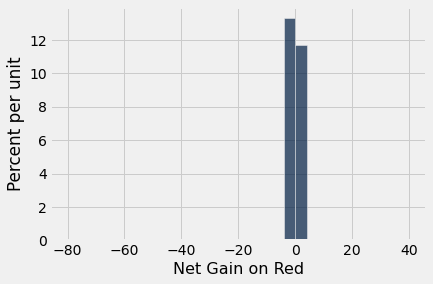

In [27]:
gains = Table().with_columns('Net Gain on Red', all_gains_red)
gains.hist(bins = np.arange(-80, 41, 4))

**Question 6:** Using the histogram above, decide whether the following statement is true or false:

>If you make 200 one-dollar bets on red, your chance of losing money is more than 50%.

Assign `loss_more_than_50` to either `True` or `False` depending on your answer to the question. **(2 points)**

<!--
BEGIN QUESTION
name: q2_6
manual: false
points:
 - 0
 - 2
-->

In [28]:
loss_more_than_50 = False
loss_more_than_50

False

In [29]:
grader.check("q2_6")

q2_6 results: All test cases passed!

### Betting on a Split ###
If betting on red doesn't seem like a good idea, maybe a gambler might want to try a different bet. A bet on a *split* is a bet on two consecutive numbers such as 5 and 6. This bets pays 17 to 1. That means if you place a one-dollar bet on the split 5 and 6, then:

- If the winning pocket is either 5 or 6, your gain is 17 dollars.
- If any other pocket wins, you lose your dollar, so your gain is -1 dollars.

**Question 7.** Define a function `dollar_bet_on_split` that takes a pocket number and returns your gain in dollars if that pocket won and you had bet one dollar on the 5-6 split. **(4 points)**

*Hint:* Remember that the pockets are represented as strings.

<!--
BEGIN QUESTION
name: q2_7
manual: false
points:
 - 2
 - 1
 - 1
-->

In [30]:
def dollar_bet_on_split(n):
    if n == '5' or n == '6' :
        return 17
    else :
        return -1

In [31]:
grader.check("q2_7")

q2_7 results: All test cases passed!

Run the cell below to check that your function is doing what it should.

In [32]:
print(dollar_bet_on_split('5'))
print(dollar_bet_on_split('6'))
print(dollar_bet_on_split('00'))
print(dollar_bet_on_split('23'))

17
17
-1
-1


**Question 8.** Add a column `Winnings: Split` to the `wheel` table. For each pocket, the column should contain your gain in dollars if that pocket won and you had bet one dollar on the 5-6 split. **(4 points)**

<!--
BEGIN QUESTION
name: q2_8
manual: false
points:
 - 0
 - 4
-->

In [33]:
split_winnings = np.array([dollar_bet_on_split(x) for x in wheel['Pocket']])
wheel = wheel.append_column('Winnings: Split', split_winnings)
wheel.show(5) # Do not change this line.

Pocket,Color,Winnings: Red,Winnings: Split
00,green,-1,-1
0,green,-1,-1
1,red,1,-1
2,black,-1,-1
3,red,1,-1


In [34]:
grader.check("q2_8")

q2_8 results: All test cases passed!

**Question 9.** Simulate the net gain in 200 one-dollar bets on the 5-6 split, repeating the process 10,000 times and saving your gains in the array `all_gains_split`. **(4 points)**

*Hint:* Your code in Questions 4 and 5 may be helpful here!

<!--
BEGIN QUESTION
name: q2_9
manual: false
points:
 - 0
 - 4
-->

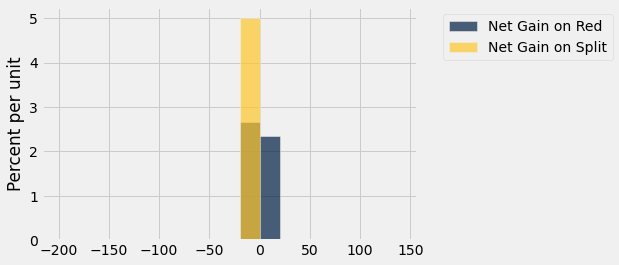

In [35]:
all_gains_split = make_array()

for i in np.arange(10000) :
    value1 = dollar_bet_on_split(1)
    all_gains_split = np.append(all_gains_split, value1)

# Do not change the two lines below
gains = gains.with_columns('Net Gain on Split', all_gains_split)
gains.hist(bins = np.arange(-200, 150, 20))

In [36]:
grader.check("q2_9")

q2_9 results: All test cases passed!

**Question 10.** Look carefully at the visualization above, and assign `histogram_statements` to an array of the numbers of each statement below that can be correctly inferred from the overlaid histogram. **(2 points)**

1. If you bet one dollar 200 times on a split, your chance of losing money is more than 50%.
2. If you bet one dollar 200 times in roulette, your chance of making more than 50 dollars is greater if you bet on a split each time than if you bet on red each time.
3. If you bet one dollar 200 times in roulette, your chance of losing more than 50 dollars is greater if you bet on a split each time than if you bet on red each time.

*Hint:* We've already seen one of these statements in a prior question.

<!--
BEGIN QUESTION
name: q2_10
manual: false
points:
 - 0
 - 0
 - 2
-->

In [37]:
histogram_statements = make_array(1,2)
histogram_statements

array([1, 2])

In [38]:
grader.check("q2_10")

q2_10 results: All test cases passed!

If this exercise has put you off playing roulette, it has done its job. If you are still curious about other bets, [here](https://en.wikipedia.org/wiki/Roulette#Bet_odds_table) they all are, and [here](https://en.wikipedia.org/wiki/Roulette#House_edge) is the bad news. The house – that is, the casino – always has an edge over the gambler.

## 3. Chances

Before you do this exercise, make sure you understand the logic behind all the examples in [Section 9.5](https://inferentialthinking.com/chapters/09/5/Finding_Probabilities.html). 

Good ways to approach probability calculations include:

- Thinking one trial at a time: What does the first one have to be? Then what does the next one have to be?
- Breaking up the event into distinct ways in which it can happen.
- Seeing if it is easier to find the chance that the event does not happen.

### Finding Chances

On each spin of a roulette wheel, all 38 pockets are equally likely to be the winner regardless of the results of other spins. Among the 38 pockets, 18 are red, 18 black, and 2 green. In each part below, write an expression that evaluates to the chance of the event described.

**Question 1.** The winning pocket is black on all of the first three spins. **(3 points)**

<!--
BEGIN QUESTION
name: q3_1
manual: false
points:
 - 0
 - 3
-->

In [39]:
first_three_black = (18/38) ** 3
first_three_black

0.10628371482723427

In [40]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 2.** The color green never wins in the first 10 spins. **(3 points)**

<!--
BEGIN QUESTION
name: q3_2
manual: false
points:
 - 0
 - 3
-->

In [41]:
no_green = (36/38) ** 10
no_green

0.5823566532299392

In [42]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.** The color green wins at least once on the first 10 spins. **(3 points)**

<!--
BEGIN QUESTION
name: q3_3
manual: false
points:
 - 0
 - 3
-->

In [43]:
at_least_one_green = 1-(36/38) ** 10
at_least_one_green

0.41764334677006076

In [44]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 4.** Two of the three colors never win in the first 10 spins. **(3 points)**

*Hint:* Imagine the event with the colors red, yellow, and orange. What situation(s) lead to two of the three colors never winning in the first 10 spins?

<!--
BEGIN QUESTION
name: q3_4
manual: false
points:
 - 0
 - 3
-->

In [45]:
lone_winners = (18/38) ** 10 + (18/38) ** 10 + (2/38) ** 10
lone_winners

0.0011374153385028288

In [46]:
grader.check("q3_4")

q3_4 results: All test cases passed!

### Comparing Chances
In each of Questions 5-7, two events A and B are described. Choose from one of the following three options and set each answer variable to a single integer:

1. Event A is more likely than Event B
2. Event B is more likely than Event A
3. The two events have the same chance.

You should be able to make the choices **without calculation**. Good ways to approach this exercise include imagining carrying out the chance experiments yourself, one trial at a time, and by thinking about the [law of averages](https://inferentialthinking.com/chapters/10/1/Empirical_Distributions.html#the-law-of-averages).

**Question 5.** A child picks four times at random from a box that has four toy animals: a bear, an elephant, a giraffe, and a kangaroo. **(2 points)**

- Event A: all four different animals are picked (assuming the child picks without replacement)
- Event B: all four different animals are picked (assuming the child picks with replacement)

<!--
BEGIN QUESTION
name: q3_5
manual: false
points:
 - 0
 - 0
 - 2
-->

In [47]:
toys_option = 1
toys_option

1

In [48]:
grader.check("q3_5")

q3_5 results: All test cases passed!

**Question 6.** In a lottery, two numbers are drawn at random with replacement from the integers 1 through 1000. **(2 points)**

- Event A: The number 8 is picked on both draws
- Event B: The same number is picked on both draws

<!--
BEGIN QUESTION
name: q3_6
manual: false
points:
 - 0
 - 0
 - 2
-->

In [49]:
lottery_option = 3
lottery_option

3

In [50]:
grader.check("q3_6")

q3_6 results: All test cases passed!

**Question 7.** A fair coin is tossed repeatedly. **(2 points)**

- Event A: There are 60 or more heads in 100 tosses
- Event B: There are 600 or more heads in 1000 tosses

*Hint*: Think about the law of averages!

<!--
BEGIN QUESTION
name: q3_7
manual: false
points:
 - 0
 - 0
 - 2
-->

In [51]:
coin_option = 1
coin_option

1

In [52]:
grader.check("q3_7")

q3_7 results: All test cases passed!

## 4. Three Ways Python Draws Random Samples

You have learned three ways to draw random samples using Python:

- `tbl.sample` draws a random sample of rows from the table `tbl`. The output is a table consisting of the sampled rows. 

- `np.random.choice` draws a random sample from a population whose elements are in an array. The output is an array consisting of the sampled elements.

- `sample_proportions` draws from a categorical distribution whose proportions are in an array. The output is an array consisting of the sampled proportions in all the categories. 

In [53]:
# Look through this code and run this cell for questions 1 and 2
top = Table.read_table('top_movies_2017.csv').select(0, 1)
top.show(3)

Title,Studio
Gone with the Wind,MGM
Star Wars,Fox
The Sound of Music,Fox


In [54]:
# Look through this code and run this cell for questions 1 and 2
studios_with_counts = top.group('Studio').sort('count', descending=True)
studios_with_counts.show(3)

Studio,count
Buena Vista,35
Warner Brothers,29
Paramount,25


In [55]:
# Look through this code and run this cell for questions 1 and 2
studios_of_all_movies = top.column('Studio')
distinct_studios = studios_with_counts.column('Studio')

print("studios_of_all_movies:", studios_of_all_movies[:10], "...")
print("\n distinct_studios:", distinct_studios)

studios_of_all_movies: ['MGM' 'Fox' 'Fox' 'Universal' 'Paramount' 'Paramount' 'Universal' 'MGM'
 'Warner Brothers' 'Disney'] ...

 distinct_studios: ['Buena Vista' 'Warner Brothers' 'Paramount' 'Fox' 'Universal' 'Disney'
 'Columbia' 'MGM' 'United Artists' 'Newline' 'Paramount/Dreamworks' 'Sony'
 'Dreamworks' 'Lionsgate' 'RKO' 'Tristar' 'AVCO' 'IFC' 'Metro' 'NM'
 'Orion' 'Selz.' 'Sum.']


In [56]:
# Look through this code and run this cell for questions 1 and 2
studio_counts_only = studios_with_counts.column('count')
studio_proportions_only = studio_counts_only / sum(studio_counts_only)

print("studio_counts_only:", studio_counts_only)
print("\n studio_proportions_only:", studio_proportions_only)

studio_counts_only: [35 29 25 24 23 11  9  7  6  5  4  4  3  3  3  2  1  1  1  1  1  1  1]

 studio_proportions_only: [0.175 0.145 0.125 0.12  0.115 0.055 0.045 0.035 0.03  0.025 0.02  0.02
 0.015 0.015 0.015 0.01  0.005 0.005 0.005 0.005 0.005 0.005 0.005]


In Questions 1 and 2, we will present a scenario. Determine which three of the following six options are true in regards to what the question is asking, and list them in the following answer cell. If your answer includes any of (i)-(iii), state what you would fill in the blank to make it true: `top`, `studios_with_counts`, `studios_of_all_movies`, `distinct_studios`, `studio_counts_only` or `studio_proportions_only`.

(i) This can be done using `sample` and the table _________.

(ii) This can be done using `np.random.choice` and the array ________.

(iii) This can be done using `sample_proportions` and the array _______.

(iv) This cannot be done using `sample` and the data given.

(v) This cannot be done using `np.random.choice` and the data given.

(vi) This cannot be done using `sample_proportions` and the data given.

<!-- BEGIN QUESTION -->

**Question 1.** Simulate a sample of 10 movies drawn at random with replacement from the 200 movies. Outputs True if Paramount appears more often than Warner Brothers among studios that released the sampled movies, and False otherwise. **(3 points)**

*Example Answer:* (i) studios_of_all_movies, (iii) top, (v)

***Note***: Do not explain your answer for any of the options you've chosen; please follow the structure of the example answer provided.

<!--
BEGIN QUESTION
name: q4_1
manual: true
-->

(i) top, (v), (vi)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.** Simulate a sample of 10 movies drawn at random with replacement from the 200 movies. Outputs True if the first sampled movie was released by the same studio as the last sampled movie. **(3 points)**

*Example Answer:* (i) studios_of_all_movies, (iii) top, (v)

***Note***: Do not explain your answer for any of the options you've chosen; please follow the structure of the example answer provided.

<!--
BEGIN QUESTION
name: q4_2
manual: true
-->

(i) top, (ii) top, (vi)

<!-- END QUESTION -->



## 5. Assessing Jade's Models

Before you begin, [Section 10.4](https://inferentialthinking.com/chapters/10/4/Random_Sampling_in_Python.html) of the textbook is a useful reference for this part.

### Games with Jade
Our friend Jade comes over and asks us to play a game with her. The game works like this: 

> We will draw randomly with replacement from a simplified 13 card deck with 4 face cards (A, J, Q, K), and 9 numbered cards (2, 3, 4, 5, 6, 7, 8, 9, 10). If we draw cards with replacement 13 times, and if the number of face cards is greater than or equal to 4, we lose.
> 
> Otherwise, Jade loses.

We play the game once and we lose, observing 8 total face cards. We are angry and accuse Jade of cheating! Jade is adamant, however, that the deck is fair.

Jade's model claims that there is an equal chance of getting any of the cards (A, 2, 3, 4, 5, 6, 7, 8, 9, 10, J, Q, K), but we do not believe her. We believe that the deck is clearly rigged, with face cards (A, J, Q, K) being more likely than the numbered cards (2, 3, 4, 5, 6, 7, 8, 9, 10).

**Question 1.** Assign `deck_model_probabilities` to a two-item array containing the chance of drawing a face card as the first element, and the chance of drawing a numbered card as the second element under Jade's model. Since we're working with probabilities, make sure your values are between 0 and 1. **(3 Points)**

<!--
BEGIN QUESTION
name: q5_1
manual: false
points:
 - 0
 - 0
 - 1
 - 2
-->

In [57]:
deck_model_probabilities = make_array((4/13),(9/13))
deck_model_probabilities

array([0.30769231, 0.69230769])

In [58]:
grader.check("q5_1")

q5_1 results: All test cases passed!

**Question 2.** We believe Jade's model is incorrect. In particular, we believe there to be a *larger* chance of getting a face card. Which of the following statistics can we use during our simulation to test between the model and our alternative? Assign `statistic_choice` to the correct answer. **(3 Points)**

1. The distance (absolute value) between the actual number of face cards in 13 draws and 4, the expected number of face cards in 13 draws
2. The expected number of face cards in 13 draws, 4
3. The number of face cards we get in 13 draws

<!--
BEGIN QUESTION
name: q5_2
manual: false
points:
 - 0
 - 0
 - 3
-->

In [59]:
statistic_choice = 1
statistic_choice

1

In [60]:
grader.check("q5_2")

q5_2 results: All test cases passed!

**Question 3.** Define the function `deck_simulation_and_statistic`, which, given a sample size and an array of model proportions (like the one you created in Question 1), returns the number of face cards in one simulation of drawing cards under the model specified in `model_proportions`. **(5 Points)**

*Hint:* Think about how you can use the function `sample_proportions`. 

<!--
BEGIN QUESTION
name: q5_3
manual: false
points:
 - 5
-->

In [61]:
def deck_simulation_and_statistic(sample_size, model_proportions):
    return sample_proportions(sample_size, model_proportions).item(0) *sample_size

deck_simulation_and_statistic(13, deck_model_probabilities)

5.0

In [62]:
grader.check("q5_3")

q5_3 results: All test cases passed!

**Question 4.** Use your function from above to simulate the drawing of 13 cards 5000 times under the proportions that you specified in Question 1. Keep track of all of your statistics in `deck_statistics`. **(5 Points)**

<!--
BEGIN QUESTION
name: q5_4
manual: false
points:
 - 2
 - 3
-->

In [63]:
repetitions = 5000 
deck_statistics = make_array()

for i in np.arange(repetitions) :
    my_value = deck_simulation_and_statistic(13, deck_model_probabilities)
    deck_statistics = np.append(deck_statistics, my_value)

deck_statistics

array([3., 5., 2., ..., 6., 6., 7.])

In [64]:
grader.check("q5_4")

q5_4 results: All test cases passed!

Let’s take a look at the distribution of simulated statistics.

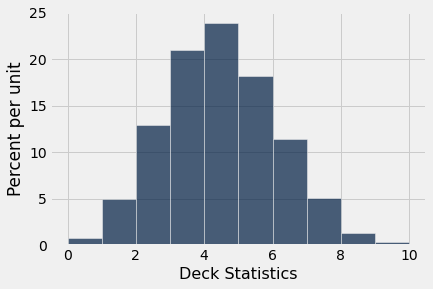

In [65]:
# Draw a distribution of statistics 
Table().with_column('Deck Statistics', deck_statistics).hist()

<!-- BEGIN QUESTION -->

**Question 5.** Given your observed value, do you believe that Jade's model is reasonable, or is our alternative (that our deck is rigged) more likely? Explain your answer using the histogram produced above. **(4 Points)**

<!--
BEGIN QUESTION
name: q5_5
manual: true
-->

I don't think that Jade's model is reasonable and the alternative idea is more likely. The graph seems to have a spiked number around 3 to 6,  numbers centralized. Therefore the chance of getting numbers are not equal, making Jade with more chance of winning.

<!-- END QUESTION -->



You're done with Homework 5!  

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save Notebook** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Go to [Gradescope](https://www.gradescope.com/courses/397747) and submit the zip file to the corresponding assignment. The name of this assignment is "HW 06 Autograder". 

**It is your responsibility to make sure your work is saved before running the last cell.**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [66]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q2_1 results: All test cases passed!

q2_10 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q2_6 results: All test cases passed!

q2_7 results: All test cases passed!

q2_8 results: All test cases passed!

q2_9 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q3_6 results: All test cases passed!

q3_7 results: All test cases passed!

q5_1 results: All test cases passed!

q5_2 results: All test cases passed!

q5_3 results: All test cases passed!

q5_4 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)